In [236]:
#importing libraries required for the project
import os
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans


Reading and processing data

In [81]:
#from google.colab import drive
#drive.mount('/content/drive')
metadata_df = pd.read_csv('./OCDetect_Export/OCDetect_Export/recording_metadata_table.csv')

In [4]:
def check_data(folder):
    df = pd.read_csv(folder)
    df['label'] = df['relabeled']
    label_counts = df['label'].value_counts()
    count_label_0 = label_counts.get(0, 0)  # Count of label 0, default to 0 if not found
    count_label_1 = label_counts.get(1, 0)  # Count of label 1, default to 0 if not found
    count_label_2 = label_counts.get(2, 0)  # Count of label 2, default to 0 if not found
    if(count_label_0 & count_label_1 & count_label_2):
        print(count_label_0)
        print(count_label_1)
        print(count_label_2)
        return 1
    else:
        return 0
        

In [6]:
txt_filename = "./output/with_data.txt"
no_files = "./output/no_data.txt"

In [65]:
for index, row in metadata_df.iterrows():
    subject_number = f"{int(row['subject']):02d}"
    recording_number = f"{int(row['rec_no']):02d}"
    recording_id = row['rec_id']
    datetime_doc = row['datetime']
    duration = row['duration']
    file_path = f"./OCDetect_Export/OCDetect_Export/OCDetect_{subject_number}_recording_{recording_number}_{recording_id}.csv"  # Adjust the path accordingly
    if(check_data(file_path) == 1):
        with open(txt_filename, 'a') as file:
            file.write(file_path + '\n')
    else:
        with open(no_files, 'a') as file:
            file.write(file_path + '\n')


1035993
1901
5703
3312070
5703
15208
2671352
1901
19010
2317396
3802
11396
3352781
1901
19010
2808885
3802
6174
4294149
1901
11406
4573500
1901
15208
4632966
1901
33575
3110014
1901
5761
2305486
1901
8148
1781713
1901
5703
4938768
5703
12074
1481022
5703
1901
4162291
13307
3802
2626968
22812
11406
2952981
13307
5703
2756074
13307
15208
2896935
11406
9505
2598302
7604
11406
2499018
13307
9329
2989284
15208
9505
2771521
7604
11406
2570820
11406
5703
4994614
9505
11406
978640
1901
1901
2300493
7604
13307
2609252
7604
17109
2320244
3802
3802
2703507
3802
11406
2864525
5703
11406
4853696
5703
15208
1867066
7604
11406
1961285
11406
1901
1271034
5703
3802
1252963
3802
1901
923817
3802
1901
3620095
3802
1901
3990958
5703
1901
3316820
7604
1901
4766528
6043
1901
1351833
1901
1406
3087608
11406
11406
2512255
1901
3802
1563822
5703
3802
2543559
3802
3802
2866460
11406
1901
2963742
1901
1901
1565533
3802
3802
1956198
3802
5703
4049022
1901
1901
3460995
3802
1901
1673355
3802
3802
3375531
1901
1901

In [184]:
data = pd.read_csv('./OCDetect_Export/OCDetect_Export/OCDetect_03_recording_06_c076109d-651c-46c4-a745-5df8b383bec3.csv')

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661186 entries, 0 to 2661185
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   timestamp    float64
 1   datetime     object 
 2   acc x        float64
 3   acc y        float64
 4   acc z        float64
 5   gyro x       float64
 6   gyro y       float64
 7   gyro z       float64
 8   user yes/no  float64
 9   compulsive   float64
 10  urge         float64
 11  tense        float64
 12  ignore       int64  
 13  relabeled    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 284.2+ MB


In [186]:
label_counts = data['relabeled'].value_counts()
count_label_0 = label_counts.get(0, 0)  # Count of label 0, default to 0 if not found
count_label_1 = label_counts.get(1, 0)  # Count of label 1, default to 0 if not found
count_label_2 = label_counts.get(2, 0)  # Count of label 2, default to 0 if not found
if(count_label_0 & count_label_1 & count_label_2):
    print(count_label_0)
    print(count_label_1)
    print(count_label_2)

2626968
22812
11406


In [203]:
filtered_data = data[(data['ignore'] == 0)]

In [208]:
data['duration'] = filtered_data.groupby('relabeled')['timestamp'].diff()
data

,timestamp,datetime,acc x,acc y,acc z,gyro x,gyro y,gyro z,user yes/no,compulsive,urge,tense,ignore,relabeled,duration
0,0.000000e+00,2022-04-06 07:39:30.000,0.486068,0.550971,0.733757,0.435644,0.488997,0.348265,-1.0,0.0,0.0,0.0,0,0,NaN
1,2.000000e+07,2022-04-06 07:39:30.020,0.492940,0.549565,0.734011,0.433246,0.492422,0.353128,NaN,NaN,NaN,NaN,0,0,20000000.0
2,4.000000e+07,2022-04-06 07:39:30.040,0.490524,0.548093,0.730652,0.435768,0.493320,0.361523,NaN,NaN,NaN,NaN,0,0,20000000.0
3,6.000000e+07,2022-04-06 07:39:30.060,0.483610,0.548523,0.724279,0.437669,0.472101,0.377649,NaN,NaN,NaN,NaN,0,0,20000000.0
4,8.000000e+07,2022-04-06 07:39:30.080,0.473198,0.550690,0.731509,0.435981,0.439430,0.386301,NaN,NaN,NaN,NaN,0,0,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421971,4.843942e+13,2022-04-06 21:06:49.420,0.526136,0.487762,0.646075,0.423209,0.522174,0.301270,NaN,NaN,NaN,NaN,0,2,20000000.0
2421972,4.843944e+13,2022-04-06 21:06:49.440,0.521138,0.496213,0.641417,0.415056,0.523072,0.296662,NaN,NaN,NaN,NaN,0,2,20000000.0
2421973,4.843946e+13,2022-04-06 21:06:49.460,0.521429,0.490276,0.627143,0.407276,0.524363,0.295434,NaN,NaN,NaN,NaN,0,2,20000000.0
2421974,4.843948e+13,2022-04-06 21:06:49.480,0.522971,0.473605,0.631013,0.397524,0.524644,0.293642,NaN,NaN,NaN,NaN,0,2,20000000.0


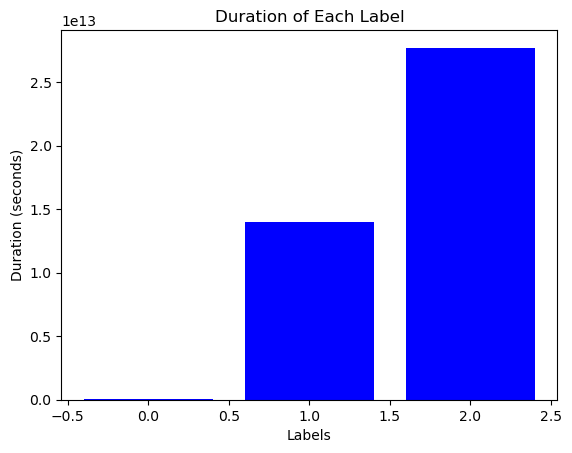

In [210]:
# Create a bar plot
plt.bar(data['relabeled'], data['duration'], color='blue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Each Label')

# Show the plot
plt.show()

In [207]:
data[data["relabeled"]==2]

,timestamp,datetime,acc x,acc y,acc z,gyro x,gyro y,gyro z,user yes/no,compulsive,urge,tense,ignore,relabeled,duration
19804,3.960800e+11,2022-04-06 07:46:06.080,0.692699,0.488159,0.697446,0.412427,0.503873,0.319494,NaN,NaN,NaN,NaN,0,2,NaN
19805,3.961000e+11,2022-04-06 07:46:06.100,0.721854,0.496808,0.687158,0.423494,0.520602,0.326559,NaN,NaN,NaN,NaN,0,2,20000000.0
19806,3.961200e+11,2022-04-06 07:46:06.120,0.716648,0.493997,0.688224,0.427828,0.541596,0.323999,NaN,NaN,NaN,NaN,0,2,20000000.0
19807,3.961400e+11,2022-04-06 07:46:06.140,0.704694,0.495088,0.700297,0.425892,0.549231,0.321081,NaN,NaN,NaN,NaN,0,2,20000000.0
19808,3.961600e+11,2022-04-06 07:46:06.160,0.694698,0.498892,0.688525,0.423884,0.545694,0.323231,NaN,NaN,NaN,NaN,0,2,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421971,4.843942e+13,2022-04-06 21:06:49.420,0.526136,0.487762,0.646075,0.423209,0.522174,0.301270,NaN,NaN,NaN,NaN,0,2,20000000.0
2421972,4.843944e+13,2022-04-06 21:06:49.440,0.521138,0.496213,0.641417,0.415056,0.523072,0.296662,NaN,NaN,NaN,NaN,0,2,20000000.0
2421973,4.843946e+13,2022-04-06 21:06:49.460,0.521429,0.490276,0.627143,0.407276,0.524363,0.295434,NaN,NaN,NaN,NaN,0,2,20000000.0
2421974,4.843948e+13,2022-04-06 21:06:49.480,0.522971,0.473605,0.631013,0.397524,0.524644,0.293642,NaN,NaN,NaN,NaN,0,2,20000000.0


In [188]:
data_a=filtered_data[filtered_data["relabeled"]==0][:11000]
data_b=filtered_data[filtered_data["relabeled"]==1][:11000]
data_c=filtered_data[filtered_data["relabeled"]==2][:11000]

In [190]:
data=pd.concat([data_a,data_b,data_c],axis=0)

In [191]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data[["acc x","acc y","acc z","gyro x","gyro y","gyro z"]]=scaler.fit_transform(data[["acc x","acc y","acc z","gyro x","gyro y","gyro z"]])

In [192]:
new_data=data.drop(['timestamp','datetime','user yes/no','compulsive', 'urge', 'tense', 'ignore'],axis=1)

In [193]:
features = new_data.drop(['relabeled'],axis=1)

In [194]:
# choosing relabeled as label value
label = new_data['relabeled']  # Create a 'label' column for majority voting

In [218]:
# Split data into train and test sets
train_data, test_data, y_train, y_test = train_test_split(features, label, random_state=8, test_size=0.4, stratify=label)
print(f"Number of train DataFrames: {len(y_train)}")
print(f"Number of test DataFrames: {len(y_test)}")

Number of train DataFrames: 19800
Number of test DataFrames: 13200


In [219]:
label_counts = y_test.value_counts()
count_label_0 = label_counts.get(0, 0)  # Count of label 0, default to 0 if not found
count_label_1 = label_counts.get(1, 0)  # Count of label 1, default to 0 if not found
count_label_2 = label_counts.get(2, 0)  # Count of label 2, default to 0 if not found
if(count_label_0 & count_label_1 & count_label_2):
    print(count_label_0)
    print(count_label_1)
    print(count_label_2)

4400
4400
4400


### Creating sliding windows and majority voting

In [220]:
# Define window size
window_size = 150
stride = 2
train_data_val = train_data.values

num_windows = len(train_data) - window_size + 1
# Initialize lists to store windowed data and labels
train_windows = []
train_labels = []


In [221]:
for i in range(0, num_windows, stride):
    window = train_data_val[i:i+window_size]  # Select only sensor axes columns
    label_window = y_train.iloc[i:i+window_size]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    train_windows.append(window)  # Convert window to numpy array
    train_labels.append(majority_label)

In [225]:

train_windows = np.array(train_windows)
train_labels = np.array(train_labels)
# Flatten the sensor axes data in each window
num_trainsamp, num_fea_trainsamp = train_windows.shape[0], np.prod(train_windows.shape[1:])
train_windows_reshaped = train_windows.reshape(num_trainsamp, num_fea_trainsamp)
print(train_windows_reshaped)
print(len(np.unique(train_labels)))


[[0.6081053  0.47699533 0.58865512 ... 0.44013783 0.54704165 0.30879491]
 [0.64771544 0.46879236 0.67114654 ... 0.41715218 0.53048164 0.27388142]
 [0.59760923 0.53172029 0.54930948 ... 0.42288971 0.54788368 0.32271935]
 ...
 [0.5685368  0.53544139 0.75250255 ... 0.44594642 0.58953632 0.21403706]
 [0.66691658 0.52126813 0.71945964 ... 0.42976409 0.51908611 0.28667962]
 [0.6041068  0.54025401 0.57002503 ... 0.38388161 0.53227798 0.31611548]]
3


In [226]:
print(train_windows_reshaped.shape)
print(train_labels.shape)

(9826, 900)
(9826,)


In [230]:
# Generate windows and labels using a sliding window approach
window = []
label_window = []
test_windows = []
test_labels = []
for i in range(0,len(test_data)-window_size+1,stride):
    window = test_data.iloc[i:i+window_size]  # Select only sensor axes columns
    test_windows.append(window)
    label_window = y_test.iloc[i:i+window_size]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    test_labels.append(majority_label)

In [231]:
test_windows = np.array(test_windows)
test_labels = np.array(test_labels)
# Flatten the sensor axes data in each window
num_trainsamp, num_fea_trainsamp = test_windows.shape[0], np.prod(test_windows.shape[1:])
test_windows_reshaped = test_windows.reshape(num_trainsamp, num_fea_trainsamp)
print(test_windows_reshaped)
print(len(np.unique(test_labels)))

[[0.57345162 0.47601956 0.61412087 ... 0.42416867 0.52043336 0.31493804]
 [0.52392852 0.47281115 0.65515803 ... 0.42740158 0.57179746 0.29635506]
 [0.60918822 0.55697415 0.75697469 ... 0.42725947 0.5116762  0.3336746 ]
 ...
 [0.5545837  0.47021465 0.67033553 ... 0.42976409 0.52498035 0.31662741]
 [0.64246741 0.53224951 0.48883123 ... 0.42116668 0.51594251 0.32256577]
 [0.62189179 0.5241954  0.75732228 ... 0.43988915 0.50432244 0.22581139]]
3


Random Forest Classifier

In [228]:
clf = RandomForestClassifier(n_estimators=10,max_depth=9, random_state=6, class_weight='balanced',min_samples_split=12)
clf.fit(train_windows_reshaped, train_labels)

RandomForestClassifier(class_weight='balanced', max_depth=9,
                       min_samples_split=12, n_estimators=10, random_state=6)

In [232]:
# Make predictions on the test set with SVM
y_pred = clf.predict(test_windows_reshaped)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print(accuracy)

report = classification_report(test_labels, y_pred)
# Print the report
print(report)

0.32929819184799264
              precision    recall  f1-score   support

           0       0.35      0.35      0.35      2306
           1       0.34      0.35      0.35      2263
           2       0.29      0.27      0.28      1957

    accuracy                           0.33      6526
   macro avg       0.33      0.33      0.33      6526
weighted avg       0.33      0.33      0.33      6526



## Naives Bayes

In [237]:
# Create and train a Gaussian Naive Bayes classifier
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights /= class_weights.sum()
# Create a dictionary to map class labels to their corresponding weights
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
NBclf = GaussianNB(priors=class_weights)
NBclf.fit(train_windows_reshaped, train_labels)

# Cross-validation
cv_scores = cross_val_score(NBclf, train_windows_reshaped, train_labels, cv=3)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.33791209 0.35572519 0.40580153]


In [238]:
# Evaluate the model
y_pred = NBclf.predict(test_windows_reshaped)
accuracy = accuracy_score(test_labels, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')
report = classification_report(test_labels, y_pred)
# Print the report
print(report)

Test Accuracy: 0.3983
              precision    recall  f1-score   support

           0       0.43      0.47      0.45      2306
           1       0.41      0.38      0.40      2263
           2       0.34      0.33      0.33      1957

    accuracy                           0.40      6526
   macro avg       0.39      0.39      0.39      6526
weighted avg       0.40      0.40      0.40      6526



## Logistic Regression

In [239]:
lclf = LogisticRegression(random_state=42)
lclf.fit(train_windows_reshaped, train_labels)

c:\Users\sruth\anaconda3\envs\studentarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [240]:
# Make predictions on the test set with logistic regression
y_pred = lclf.predict(test_windows_reshaped)

# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print(accuracy)

report = classification_report(test_labels, y_pred)
# Print the report
print(report)

0.3409439166411278
              precision    recall  f1-score   support

           0       0.32      0.39      0.36      2306
           1       0.39      0.41      0.40      2263
           2       0.29      0.19      0.23      1957

    accuracy                           0.34      6526
   macro avg       0.33      0.33      0.33      6526
weighted avg       0.34      0.34      0.33      6526



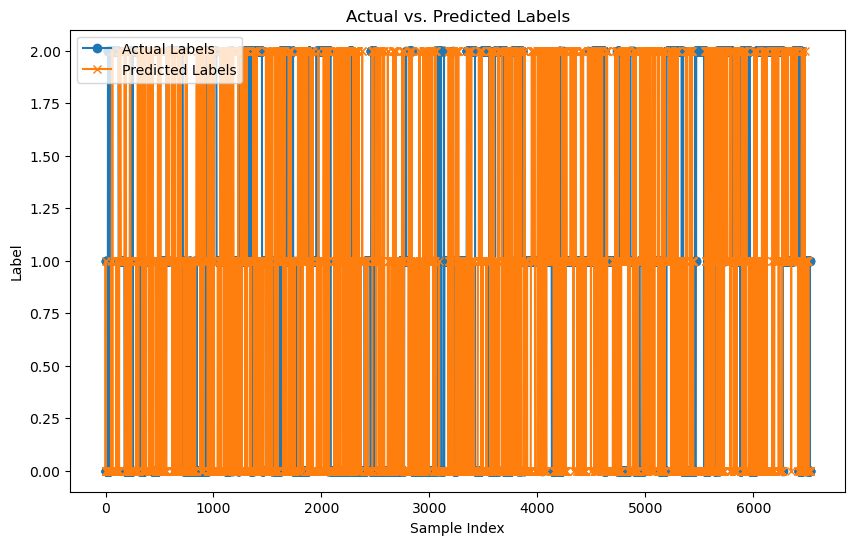

In [241]:
# Plot actual vs. predicted labels
plt.figure(figsize=(10, 6))
plt.plot(test_labels, label='Actual Labels', marker='o')
plt.plot(y_pred, label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()